# WorkFlow
## Becoming one with the data
## Loading the data
## Modelling
### Transfer Learning Classification vs Transfer Learning Feature Extraction vs CNN vs Classification
#### Transfer Learning Classification
#### Transfer Learning Feature Extraction
#### CNN
#### Classification
...

In [3]:
!nvidia-smi

Sun Apr 25 14:43:06 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.73.01    Driver Version: 460.73.01    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 3060    Off  | 00000000:26:00.0  On |                  N/A |
|  0%   57C    P5    17W / 170W |    648MiB / 12045MiB |     40%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session =tf.compat.v1.InteractiveSession(config=config)
gpu = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf
import tensorflow_hub as hub
import wandb
from wandb.keras import WandbCallback
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def walk_through(directory):
    i = -1
    path_df = pd.DataFrame({'Path':[],'Files_Nums':[]})
    for path, _, files in os.walk(directory):
        print(path)
        print(len(files))
        i = i + 1
        new_df = pd.DataFrame({'Path':path,'Files_Nums':len(files)},index=[i])
        path_df = pd.concat([path_df,new_df])
    return path_df
def plot_random_imgs(how_many_imgs,main_dir,figsize=(10,7)):
    for _ in range(how_many_imgs):
      class_name = random.choice(os.listdir(main_dir))
      random_img = random.choice(os.listdir(f'{main_dir}/{class_name}/'))
      path = f"{main_dir}/{class_name}/{random_img}"
      print(path)
      img = mpimg.imread(path)
      img = img / 255.0
      plt.figure(figsize=figsize)
      plt.imshow(img)
      plt.axis(False)
      plt.title(f'Img Shape - {img.shape} | Class Name - {class_name} | Path - {path}')
      plt.show();

## Becoming one with the data

./data/raw/dataset//without_mask/467.jpg


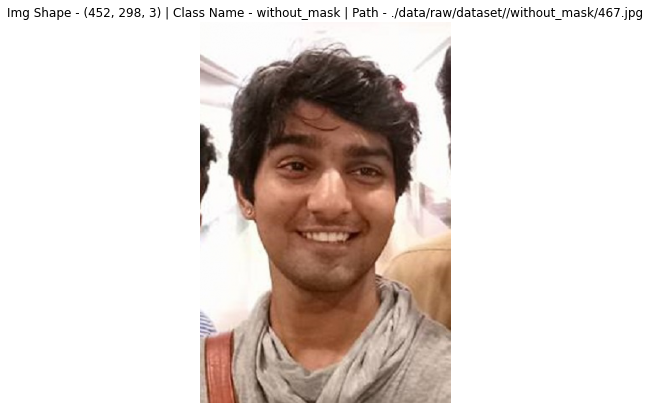

./data/raw/dataset//incorrect_mask/aug_642.jpg


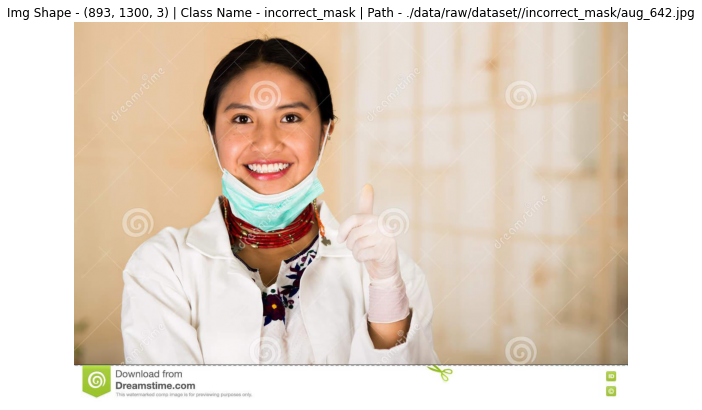

./data/raw/dataset//without_mask/308.jpg


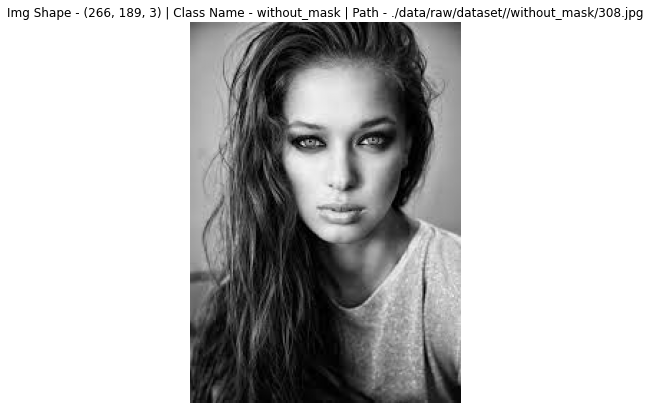

./data/raw/dataset//without_mask/237.jpg


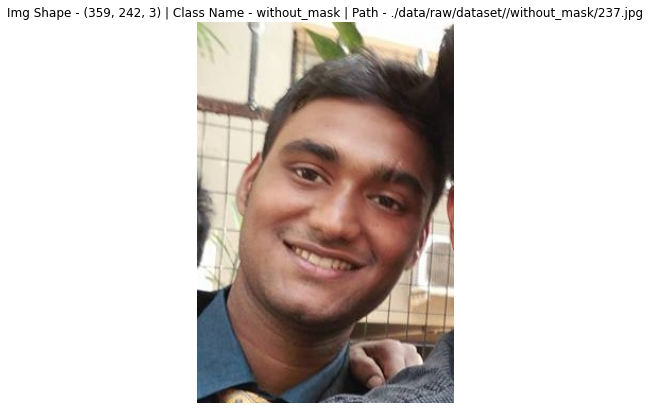

./data/raw/dataset//with_mask/augmented_image_102.jpg


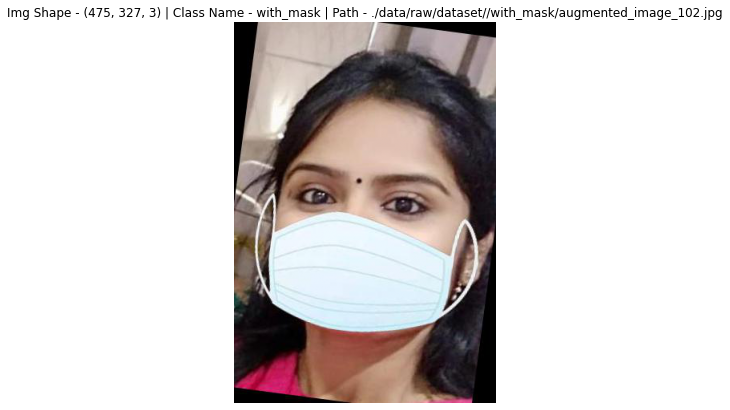

In [6]:
plot_random_imgs(how_many_imgs=5,main_dir='./data/raw/dataset/')

In [7]:
samples_df = walk_through('./data/raw/dataset')

./data/raw/dataset
0
./data/raw/dataset/incorrect_mask
703
./data/raw/dataset/without_mask
686
./data/raw/dataset/with_mask
690


<AxesSubplot:>

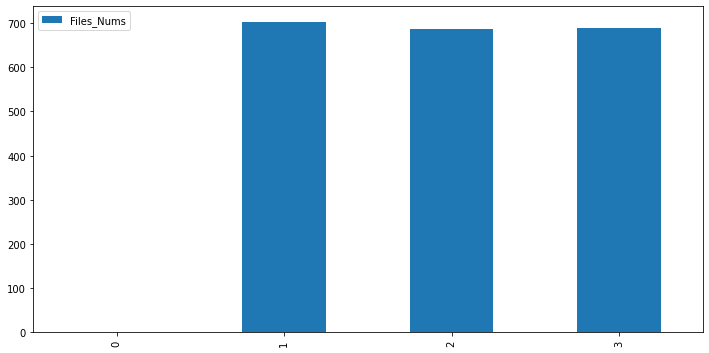

In [8]:
samples_df.plot.bar(figsize=(12,6))

In [9]:
samples_df

,Path,Files_Nums
0,./data/raw/dataset,0.0
1,./data/raw/dataset/incorrect_mask,703.0
2,./data/raw/dataset/without_mask,686.0
3,./data/raw/dataset/with_mask,690.0


## Loading the data

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_small = ImageDataGenerator(rescale=1/255.0,width_shift_range=0.25,height_shift_range=0.25,shear_range=0.25,zoom_range=0.25,horizontal_flip=True,vertical_flip=True,validation_split=0.75)
datagen_large = ImageDataGenerator(rescale=1/255.0,width_shift_range=0.25,height_shift_range=0.25,shear_range=0.25,zoom_range=0.25,horizontal_flip=True,vertical_flip=True,validation_split=0.25)
train_data_small = datagen_small.flow_from_directory('./data/raw/dataset',shuffle=False,target_size=(224,224),subset='training')
valid_data_small = datagen_small.flow_from_directory('./data/raw/dataset',shuffle=False,target_size=(224,224),subset='validation')
train_data_large = datagen_large.flow_from_directory('./data/raw/dataset',shuffle=True,target_size=(224,224),subset='training')
valid_data_large = datagen_large.flow_from_directory('./data/raw/dataset',shuffle=True,target_size=(224,224),subset='validation')

Found 521 images belonging to 3 classes.
Found 1558 images belonging to 3 classes.
Found 1561 images belonging to 3 classes.
Found 518 images belonging to 3 classes.


## Modelling

### Transfer Learning Classification vs Transfer Learning Feature Extraction vs CNN vs Classification

#### TL Classification

In [11]:
class_names = os.listdir('./data/raw/dataset')
PROJECT_NAME = "Mask-Detection-V4"

In [12]:
# wandb.init(project=PROJECT_NAME,name='tl-classification-baseline')
# model = tf.keras.Sequential([
#     hub.KerasLayer('https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5',input_shape=(224,224,3)),
#     tf.keras.layers.Dense(len(class_names),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_small,validation_data=(valid_data_small),epochs=25,callbacks=[WandbCallback()])

#### TL Feature Extraction

In [13]:
#  wandb.init(project=PROJECT_NAME,name='tl-feature-extraction-baseline')
# model = tf.keras.Sequential([
#     hub.KerasLayer('https://tfhub.dev/tensorflow/efficientnet/lite0/feature-vector/2',input_shape=(224,224,3),trainable=False),
#     tf.keras.layers.Dense(len(class_names),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_small,validation_data=(valid_data_small),epochs=25,callbacks=[WandbCallback()])

#### CNN

In [14]:
import tensorflow as tf

In [15]:
# wandb.init(project=PROJECT_NAME,name='CNN-baseline')
# model = tf.keras.Sequential([
#   tf.keras.layers.Conv2D(25,3,activation='relu',input_shape=(224,224,3)),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(25,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(25,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(25,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(25,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(25,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(len(class_names),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_small,validation_data=(valid_data_small),epochs=25,callbacks=[WandbCallback()])
# wandb.finish()

#### Classification

In [16]:
# wandb.init(project=PROJECT_NAME,name='classification-baseline')
# model = tf.keras.Sequential([
#   tf.keras.layers.Flatten(input_shape=(224,224,3)),
#   tf.keras.layers.Dense(5, activation="relu"),
#   tf.keras.layers.Dense(5, activation="relu"),
#   tf.keras.layers.Dense(5, activation="relu"),
#   tf.keras.layers.Dense(5, activation="relu"),
#   tf.keras.layers.Dense(5, activation="relu"),
#   tf.keras.layers.Dense(len(class_names),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_small,validation_data=(valid_data_small),epochs=25,callbacks=[WandbCallback()])

## Feature Extraction vs Classification

In [17]:
# wandb.init(project=PROJECT_NAME,name='tl-feature-extraction-baseline-1')
# model = tf.keras.Sequential([
#     hub.KerasLayer('https://tfhub.dev/tensorflow/efficientnet/lite1/feature-vector/2',input_shape=(224,224,3),trainable=False),
#     tf.keras.layers.Dense(len(class_names),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_small,validation_data=(valid_data_small),epochs=50,callbacks=[WandbCallback()])

In [18]:
# wandb.init(project=PROJECT_NAME,name='tl-classification-baseline-1')
# model = tf.keras.Sequential([
#     hub.KerasLayer('https://tfhub.dev/tensorflow/efficientnet/lite1/classification/2',input_shape=(224,224,3)),
#     tf.keras.layers.Dense(len(class_names),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_small,validation_data=(valid_data_small),epochs=50,callbacks=[WandbCallback()])

### Classification TL wins

### Best DL TL Classification Family

In [19]:
models = [
          # ['efficnetnetb0','https://tfhub.dev/tensorflow/efficientnet/lite0/classification/2'],
          # ['efficnetnetb1','https://tfhub.dev/tensorflow/efficientnet/b1/classification/1'],
          # ['efficnetnetb2','https://tfhub.dev/tensorflow/efficientnet/lite2/classification/2'],
          # ['efficnetnetb3','https://tfhub.dev/tensorflow/efficientnet/b3/classification/1'],
          # ['inception_v1','https://tfhub.dev/google/imagenet/inception_v1/classification/5'],
          # ['mobilenet_v1_100_224','https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/quantops/classification/3'],
          # ['mobilenet_v2_130_224','https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'],
          # ['resnet_50','https://tfhub.dev/tensorflow/resnet_50/classification/1'],
          # ['resnet_v2_152','https://tfhub.dev/google/imagenet/resnet_v2_152/classification/5'],
]

In [20]:
for model in models:
  print('*'*50)
  print(model)
  print('*'*50)
  wandb.init(project=PROJECT_NAME,name=f'{model[0]}')
  model = tf.keras.Sequential([
      hub.KerasLayer(model[1],input_shape=(224,224,3)),
      tf.keras.layers.Dense(len(class_names),activation='softmax')
  ])
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
  model.fit(train_data_small,validation_data=(valid_data_small),epochs=round(12.5),callbacks=[WandbCallback()])
  wandb.finish()
  print('*'*50)
  print(model)
  print('*'*50)

In [21]:
models = [
          # ['efficnetnetb0','https://tfhub.dev/tensorflow/efficientnet/lite0/classification/2'],
          # ['efficnetnetb1','https://tfhub.dev/tensorflow/efficientnet/lite1/classification/1'],
          # ['efficnetnetb2','https://tfhub.dev/tensorflow/efficientnet/lite2/classification/2'],
          # ['efficnetnetb3','https://tfhub.dev/tensorflow/efficientnet/lite3/classification/1'],
          # ['efficnetnetb4','https://tfhub.dev/tensorflow/efficientnet/lite4/classification/1'],
          # ['efficnetnetb5','https://tfhub.dev/tensorflow/efficientnet/b5/classification/1'],
          # ['efficnetnetb6','https://tfhub.dev/tensorflow/efficientnet/b6/classification/1'],
          # ['efficnetnetb7','https://tfhub.dev/tensorflow/efficientnet/b7/classification/1'],
]

In [22]:
for model in models:
  print('*'*50)
  print(model)
  print('*'*50)
  wandb.init(project=PROJECT_NAME,name=f'{model[0]}-efficnetnet')
  model = tf.keras.Sequential([
      hub.KerasLayer(model[1],input_shape=(224,224,3)),
      tf.keras.layers.Dense(len(class_names),activation='softmax')
  ])
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
  model.fit(train_data_small,validation_data=(valid_data_small),epochs=round(12.5),callbacks=[WandbCallback()])
  wandb.finish()
  print('*'*50)
  print(model)
  print('*'*50)

Best accuracy = efficnetnetb0

Best val accuracy = efficnetnetb0

Best loss = efficnetnetb1

Best val loss = efficnetnetb0

In [23]:
# model_url = 'https://tfhub.dev/tensorflow/efficientnet/lite0/classification/2'
# wandb.init(project=PROJECT_NAME,name='Big-Dog-Model-0')
# model = tf.keras.Sequential([
#     hub.KerasLayer(model_url,input_shape=(224,224,3)),
#     tf.keras.layers.Dense(len(class_names),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_large,validation_data=(valid_data_large),epochs=100,callbacks=[WandbCallback(),tf.keras.callbacks.EarlyStopping(patience=5)])
# wandb.finish()
# print('*'*50)
# print(model)
# print('*'*50)

In [27]:
model = tf.keras.models.load_model('./model-0.h5',custom_objects={'KerasLayer':hub.KerasLayer})

In [33]:

from keras_preprocessing import image
import numpy as np

In [35]:
test_imgs

['download (34).jpeg', 'images (12).jpeg']

In [36]:
class_names = ['incorrect_mask','with_mask','without_mask']

In [39]:
test_imgs = os.listdir('./data/test_data')
for test_img in test_imgs:
  img = image.load_img(f"./data/test_data/{test_img}", target_size=(224, 224))
  print('-')
  img = image.img_to_array(img)
  print('-')
  img = img / 255.0
  print('-')
  preds = model.predict(np.expand_dims(img, axis=0))
  print('-')
  print(preds)
  print('-')
  plt.figure(figsize=(10,7))
  print('-')
  plt.imshow(img)
  print('-')
  plt.title(f'{class_names[tf.argmax(tf.squeeze(preds))]}')
  print('-')
  plt.axis(False)
  print('-')
  plt.show();